<a href="https://colab.research.google.com/github/shakil1819/NLTK-LSTM-Based-Hate-Speech-Detection/blob/main/Comparative_study_of_LSTM_and_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLTK Portion :

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           

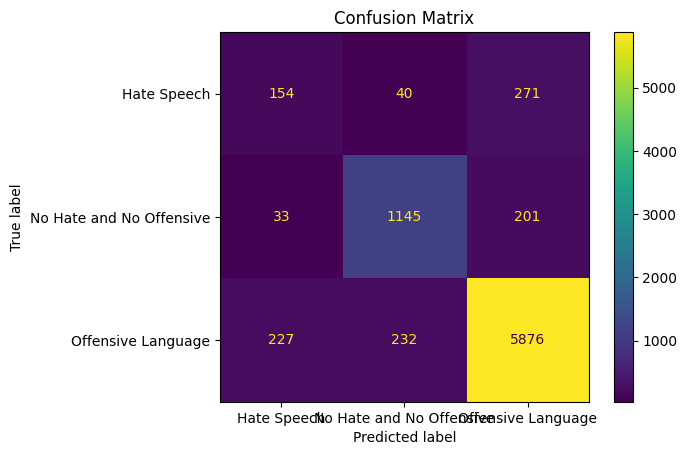

In [1]:
# -*- coding: utf-8 -*-
"""NLTK_For_twitter_dataset.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/github/shakil1819/NLTK-LSTM-Based-Hate-Speech-Detection/blob/main/NLTK_For_twitter_dataset.ipynb

**Dataset**
"""

from nltk.util import pr
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
nltk.download("stopwords")
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
data = pd.read_csv("https://raw.githubusercontent.com/shakil1819/NLTK-LSTM-Based-Hate-Speech-Detection/main/Dataset/labeled_data.csv")
print(data.head())

"""### Labeling The Dataset"""

data["labels"] = data["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and No Offensive"})
print(data.head())

data = data[["tweet", "labels"]]
print(data.head())

"""### Dataset Cleaning"""

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)
print(data["tweet"].head())

"""### Splitting test and train dataset

"""

x = np.array(data["tweet"])
y = np.array(data["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

"""### Detector"""

# sample = "Let's unite and kill all the people who are protesting against the government"
sample = "Let's leave this country"
data = cv.transform([sample]).toarray()
print(clf.predict(data))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Add model predictions
y_pred = clf.predict(X_test)

# Model Accuracy
nltkaccuracy = np.mean(y_pred == y_test)
print("Accuracy:", np.mean(y_pred == y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(include_values=True, cmap='viridis', ax=plt.gca())
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# LSTM Portion:

tweet    0
class    0
dtype: int64


<ipython-input-2-5a3e118c0364>:68: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['tweet'] = df['tweet'].str.replace(punct_sign, '')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-2-5a3e118c0364>:84: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(regex_stopword, '')


accuracy is:  0.8377942165433759
accuracy is:  0.823537323470074
accuracy is:  0.8468056489576328
Epoch 1/5
272/272 [==============================] - 191s 682ms/step - loss: 0.4207 - accuracy: 0.7743 - val_loss: 0.4025 - val_accuracy: 0.7743
Epoch 2/5
272/272 [==============================] - 163s 601ms/step - loss: 0.4022 - accuracy: 0.7743 - val_loss: 0.4013 - val_accuracy: 0.7743
Epoch 3/5
272/272 [==============================] - 166s 611ms/step - loss: 0.4017 - accuracy: 0.7743 - val_loss: 0.4009 - val_accuracy: 0.7743
Epoch 4/5
272/272 [==============================] - 166s 609ms/step - loss: 0.4013 - accuracy: 0.7743 - val_loss: 0.4015 - val_accuracy: 0.7743
Epoch 5/5
272/272 [==============================] - 167s 613ms/step - loss: 0.4011 - accuracy: 0.7743 - val_loss: 0.4006 - val_accuracy: 0.7743


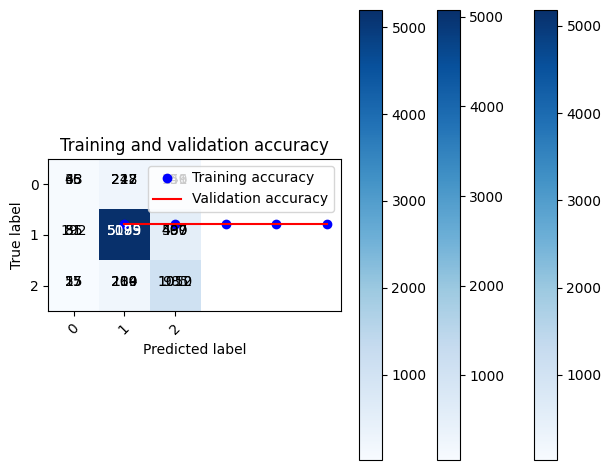

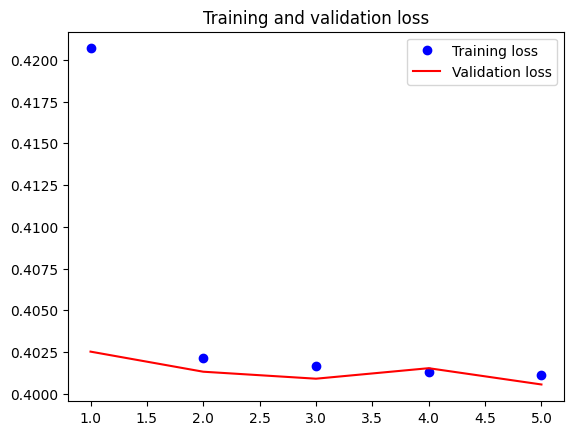

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
# -*- coding: utf-8 -*-
"""LSTM_Twitter_dataset.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/github/shakil1819/NLTK-LSTM-Based-Hate-Speech-Detection/blob/main/LSTM_Twitter_dataset.ipynb

# Imorting Libraries
"""

import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from joblib import dump, load

"""# Reading the dataset"""

text = []
clas = []
df = pd.read_csv('https://raw.githubusercontent.com/shakil1819/NLTK-LSTM-Based-Hate-Speech-Detection/main/Dataset/labeled_data.csv')
text = df['tweet'].tolist()
clas = df['class'].tolist()
df.head()

"""# creating a new dataframe for easy text processing"""

df = pd.DataFrame({'tweet': text, 'class': clas})

"""# Finding if there is any missing data"""

print(df.isnull().sum())

"""# Converting the data into lower case."""

df['tweet'] = df['tweet'].apply(lambda x:x.lower())

"""# removing punctuations"""

punctuation_signs = list("?:!.,;")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

"""# Removing '\n' and '\t', extra spaces, quoting text, and progressive pronouns."""

df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

"""# removing stop-words"""

nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

"""# Using Bag of Words approach for final data Preparation.¶"""

cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']

"""# Splitting the Data using Stratified split"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

"""# Using Random Forest Classifier as the Model and printing evaluating it using confusion matrix"""

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'rf.joblib')

"""# Using Decision tree as the Model and printing evaluating it using confusion matrix"""

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'decision.joblib')

"""# Using AdaBoost Classifier as the Model and printing evaluating it using confusion matrix"""

clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'ada.joblib')

"""# Converting the labels into categorical format"""

y_train=to_categorical(y_train, num_classes = 3, dtype='float32')
y_test=to_categorical(y_test, num_classes = 3, dtype='float32')

"""# Creating and Training an LSTM Model"""

model = Sequential()
model.add(Embedding(232337, 100, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#epochs = 25
epochs = 5
batch_size = 64

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

"""# Saving the LSTM Model"""

model.save('lstm.h5')

# Performance Comparison and visualization

 11/233 [>.............................] - ETA: 2s

<ipython-input-11-7264178816ab>:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  nltk_accuracy = np.mean(y_pred == y_test)


233/233 [==============================] - 3s 13ms/step
NLTK Accuracy: 0.000
Hamming Loss: 0.150
LSTM Accuracy: 0.774


Text(0.5, 1.0, 'Model Loss Comparison')

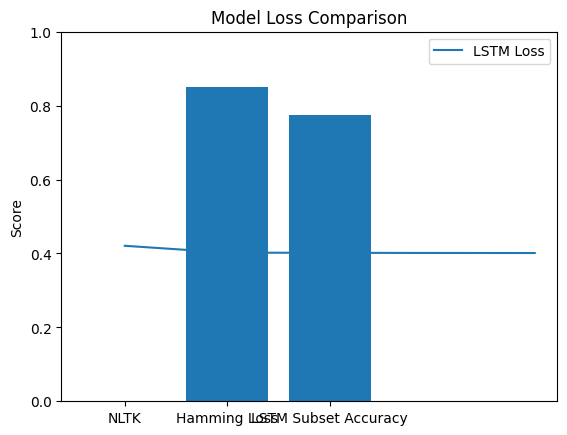

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import hamming_loss, accuracy_score

# NLTK model
nltk_accuracy = np.mean(y_pred == y_test)

# LSTM model
lstm_predictions = (model.predict(X_test) > 0.5).astype("int32")

# Calculate Hamming loss (for multi-label classification)
hamming_loss_val = hamming_loss(y_test, lstm_predictions)

# Calculate subset accuracy or exact match ratio
# This checks if all predicted labels for a sample match true labels
subset_accuracy = accuracy_score(y_test, lstm_predictions)
print(f"===================================")
print(f"NLTK Accuracy: {nltk_accuracy:.3f}")
print(f"Hamming Loss: {hamming_loss_val:.3f}")
print(f"LSTM Accuracy: {subset_accuracy:.3f}")
print(f"===================================")
# Plot accuracy, Hamming loss, and subset accuracy comparison
algos = ['NLTK', 'Hamming Loss', 'LSTM Subset Accuracy']
scores = [nltk_accuracy, 1 - hamming_loss_val, subset_accuracy]  # Convert Hamming loss to accuracy-like metric

plt.bar(algos, scores)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)

# Plot loss curves
plt.plot(history.history['loss'], label='LSTM Loss')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.legend()
plt.title("Model Loss Comparison")
